In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

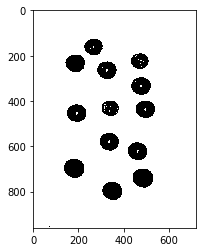

In [2]:
#image 흑백처리, 이진화 (그냥 Threshold)

img = cv2.imread('./images/jpc3.jpg')
img_ori = img.copy()
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


#배경과 종이의 색감 차이에 따라 threshold값 다르게 줄 것 (평균 170)
ret_threshold, binary_img = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY_INV)
#A4를 쓸 경우 활성화 
binary_img=cv2.bitwise_not(binary_img)


plt.imshow(binary_img, cmap='gray')

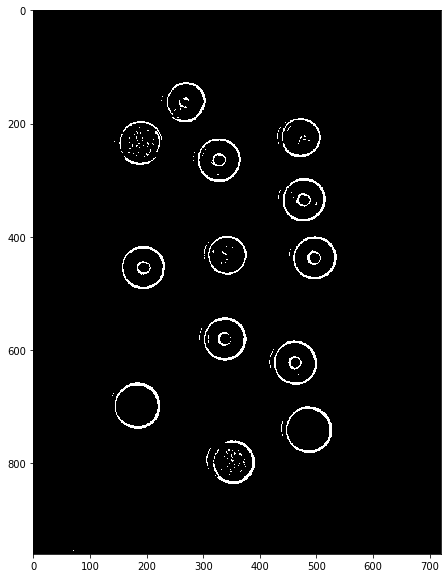

In [3]:
#블러처리 후 threshold(adapted threshold)

img_blurred = cv2.GaussianBlur(img_gray, ksize=(5, 5), sigmaX=0)

img_thresh = cv2.adaptiveThreshold(
    img_blurred, 
    maxValue=255.0,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY_INV, 
    blockSize=19, 
    C=9
)

plt.figure(figsize=(12, 10))
plt.imshow(img_thresh, cmap='gray')

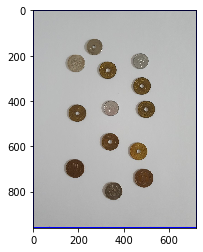

In [4]:
#contour을 찾고 A4용지의 외곽선 그리기
img, contour, hierarchy = cv2.findContours(binary_img, 
                                            cv2.RETR_EXTERNAL, 
                                            cv2.CHAIN_APPROX_SIMPLE)

img = img_ori.copy()

# Draw Contour with Blue
cv2.drawContours(img, contour, -1, (255,0,0), 3)
plt.figure()
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

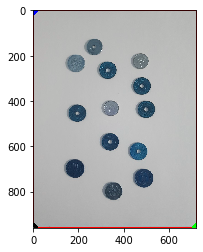

In [5]:
#그려진 외곽선을 바탕으로 꼭짓점 찾기 (perspective point)

cnt=contour[-1]

#좌표점의 순서는 빨->검->파->녹
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

# 좌표 표시하기
cv2.circle(img,leftmost,20,(255,0,0),-1) #빨강
cv2.circle(img,rightmost,20,(0,255,0),-1) #녹색
cv2.circle(img,topmost,20,(0,0,255),-1) #파랑
cv2.circle(img,bottommost,20,(0,0,0),-1) #검정

img = cv2.drawContours(img, cnt, -1, (255,255,255), 5)

plt.imshow(img)

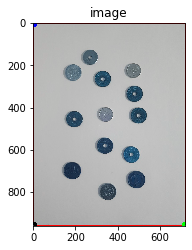

In [6]:
#prospective Transform
pts1 = np.float32([topmost,leftmost,rightmost,bottommost])
#pts1 = np.float32([leftmost,bottommost,topmost,rightmost])

# 좌표의 이동점
pts2 = np.float32([[0,0],[0,437],[640,0],[640,437]])

M = cv2.getPerspectiveTransform(pts1, pts2)

#dst = cv2.warpPerspective(img, M, (640,437))


plt.subplot(121),plt.imshow(img),plt.title('image')
#plt.subplot(122),plt.imshow(dst),plt.title('Perspective')
plt.show()

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
#0
image = img
cv2.imshow("result",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow("result",gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

edge = cv2.Canny(gray,50,150)
cv2.imshow("result",edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

#1

edge = cv2.bitwise_not(edge)
cv2.imshow("result",edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

contours = cv2.findContours(edge.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(edge,contours[1],-1,(0,0,0),3)
cv2.imshow("result",edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

#2
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(edge)

for i in range(nlabels):
    if i<2:
        continue
    
    area = stats[i,cv2.CC_STAT_AREA]
    center_x = int(centroids[i,0])
    center_y = int(centroids[i,1])
    left = stats[i,cv2.CC_STAT_LEFT]
    top = stats[i,cv2.CC_STAT_TOP]
    width = stats[i,cv2.CC_STAT_WIDTH]
    height = stats[i,cv2.CC_STAT_HEIGHT]
    
    if area>50:
        cv2.rectangle(img,(left,top),(left + width, top+height),
                      (0,0,255),1)
        cv2.circle(img,(center_x,center_y),5,(255,0,0),1)
        cv2.putText(img,str(i),(left+20,top+20),
                   cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2)
        
cv2.imshow("result",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
import cv2 
import numpy as np 


img = cv2.medianBlur(img, 5) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20, param1 = 220, param2 = 20)[0] 

dbg_img = np.zeros((img.shape[0], img.shape[1], 6), np.uint8) 
count500 = 0
count100 = 0
count50 = 0
count10 = 0
count5 = 0
count1 = 0
for c in circles: 
    print('Detected circle: center = ({} {}), radius = {}'.format(c[0],c[1],c[2]))
    
    if(42< c[2] < 38 or 29 < c[2] < 28) :
        cv2.circle(dbg_img, (c[0], c[1]), c[2], (255,0,0), 2)
        count500 +=1
    
    elif(33< c[2] < 38 or 25 < c[2] < 28) :
        cv2.circle(dbg_img, (c[0], c[1]), c[2], (0,0,255), 2)
        count100 +=1
        
    elif(1 < c[2] < 3) :
        cv2.circle(dbg_img, (c[0], c[1]), c[2], (0,0,0), 2)
        count50 +=1
        
    elif(c[2] < 42 or 24 < c[2] < 25) :
        cv2.circle(dbg_img, (c[0], c[1]), c[2], (0,255,0), 2)
        count10 +=1
        
    elif(4< c[2] <5) :
        cv2.circle(dbg_img, (c[0], c[1]), c[2], (255,255,255), 2)
        count5 +=1
        
    elif(6<c[2]<12) :
        cv2.circle(dbg_img, (c[0], c[1]), c[2], (0,170,170), 2)
        count1 +=1
        
    
#for i in circles[0,:]:
 #   cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),1)  #그냥 테두리
  #  cv2.circle(cimg,(i[0],i[1]),[33:36],(0,0,255),1)  #100원
   # cv2.circle(cimg,(i[0],i[1]),[37:42],(255,0,0),1) #500원 
    
cv2.imshow('img', img) 
cv2.imshow('dbg_img', dbg_img) 
cv2.waitKey() 
cv2.destroyAllWindows()

Detected circle: center = (353.5 797.5), radius = 38.0


error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\core\src\array.cpp:3232: error: (-215) cn <= 4 in function cv::scalarToRawData


In [ ]:
import requests
import json

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

def jpy2krw():
    url = 'https://finance.naver.com/marketindex/exchangeDetail.nhn?marketindexCd=FX_JPYKRW'
    exchange = requests.get(url, headers=headers).json()
    return exchange[0]['basePrice']

# 외화 1 단위 --> 원화
jpy = jpy2krw()
print('환율 : 1 엔 당', jpy / 100)

# 원화 --> 외화
jpy_tot = total / (jpy/100)
jpy_tot = round(jpy_tot, 2)

print('JPY총액: ', jpy_tot)